# MNIST Digit Classification Using Perceptron Learning Algorithm (PLA)

**Objective:**  
This notebook compares the performance of two variants of the Perceptron Learning Algorithm (PLA) on the MNIST digit classification task:
- **Clean PLA:** Standard perceptron without enhancements.
- **Pocket PLA:** Enhanced perceptron that stores the best-performing weights during training (using the Pocket algorithm).

**Dataset:**  
- MNIST dataset consisting of 60,000 training samples and 10,000 test samples.
- The images are normalized to the range [0, 1] and a bias term is added, resulting in input samples with 785 features.

**Evaluation Metrics:**  
- **Confusion Matrices:** Provides a detailed view of how well each digit is classified.
- **Overall Accuracy (ACC):** Defined as \(\text{ACC} = \frac{TP + TN}{TP + TN + FP + FN}\).
- **Sensitivity (True Positive Rate, TPR):** For each digit, calculated as \(\text{TPR} = \frac{TP}{TP + FN}\), showing the model’s ability to correctly identify the digit.
- **Selectivity (Specificity, TNR):** For each digit, calculated as \(\text{TNR} = \frac{TN}{TN + FP}\), showing the model’s ability to correctly identify negatives.
- **Training and Testing Error Curves:** Visualized as a function of iteration for detailed analysis of learning dynamics.
- **Runtime:** The time taken to train the models.

**Goals:**  
- Evaluate and compare the model accuracy and robustness between Clean PLA and Pocket PLA.
- Analyze and visualize the performance through confusion matrices, error curves, and summary plots (accuracy, sensitivity, selectivity, and runtime vs. the number of iterations).
- Provide a comprehensive discussion on how training iterations affect the decision boundaries and the overall performance, particularly in the one-vs-all classification setup.

This notebook integrates detailed quantitative evaluation with comprehensive visualizations to thoroughly analyze the multi-class Perceptron performance on the MNIST dataset.


In [1]:
%%capture run_output
%matplotlib inline

import sys
import os
# Assuming 'notebooks/' is one folder below your project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

import numpy as np
import matplotlib.pyplot as plt
from core.data.mnist_loader import load_mnist
from core.data.data_preprocessing import preprocess_data
from core.models.perceptron.multi_class_perceptron import MultiClassPerceptron
from core.analysis.evaluation_functions import evaluate_model
from core.analysis.plotting import plot_error_curves

# Define different max_iter values for testing
# max_iter_values = [10, 20, 30, 50, 100, 500, 1000]
max_iter_values = [i for i in range(1,21)]
# max_iter_values = [10, 20]

# # Ensure results directories exist
# os.makedirs("results/perceptron_results/clean", exist_ok=True)
# os.makedirs("results/perceptron_results/pocket", exist_ok=True)


## 1. Load and Preprocess the MNIST Dataset

We'll load the MNIST dataset using our custom loader (`mnist_loader`) and then apply preprocessing (`data_preprocessing`). The preprocessing step normalizes each image to the range [0, 1] and adds a bias term, resulting in input samples with 785 features. This setup ensures that the training set contains 60,000 samples and the test set 10,000 samples, preparing the data for the subsequent classification tasks.

In [2]:
from core.data.mnist_loader import load_mnist
from core.data.data_preprocessing import preprocess_data
import logging

# Load raw MNIST data (X: images, y: labels)
X_raw, y_raw = load_mnist()

logger = logging.getLogger("MyGlobalLogger")

logger.info("Raw MNIST data shapes: X_raw: %s, y_raw: %s", X_raw.shape, y_raw.shape)

# Preprocess (normalize & add bias = True)
X = preprocess_data(X_raw, add_bias=True, normalize=True)
logger.info("Preprocessed shape: %s", X.shape)

# Split into train/test manually or with 60k/10k as the task suggests
X_train, y_train = X[:60000], y_raw[:60000]
X_test,  y_test  = X[60000:], y_raw[60000:]

logger.info("Train set: X_train: %s, y_train: %s", X_train.shape, y_train.shape)
logger.info("Test set: X_test: %s, y_test: %s", X_test.shape, y_test.shape)


## 2. Train, Evaluate, and Visualize Training Results

This section trains, evaluates, and visualizes the performance of **Clean PLA** and **Pocket PLA** across multiple values of `max_iter`.

### **Training and Evaluation Steps:**

1. **Train Models for Different Iterations (`max_iter`):**  
   - Train **Clean PLA** (standard Perceptron) and **Pocket PLA** (best-weight tracking variant) in a one-vs-all setup.
   - Each digit is handled by a separate binary classifier with batch updates on all misclassified samples.
   - Trained models are stored for later analysis.

2. **Assess Model Performance:**  
   - **Confusion Matrices:** Generate annotated confusion matrices to inspect per-class predictions.
   - **Overall Accuracy (ACC):** Calculate accuracy as \(\text{ACC} = \frac{TP + TN}{TP + TN + FP + FN}\).
   - **Sensitivity (TPR):** For each digit, compute \(\text{TPR} = \frac{TP}{TP + FN}\).
   - **Selectivity (TNR):** For each digit, compute \(\text{TNR} = \frac{TN}{TN + FP}\).
   - **Runtime:** Record the training time.

3. **Performance Visualization:**  
   - Plot **Accuracy vs. Max Iterations** to observe the effect of iteration count on accuracy.
   - Plot **Runtime vs. Max Iterations** to examine computational efficiency.
   - Generate an extended summary plot combining Accuracy, Sensitivity (TPR), Selectivity (TNR), and Runtime vs. `max_iter`.

📌 **Goal:**  
Understand how the iteration count (`max_iter`) impacts accuracy, sensitivity, selectivity, and runtime. This analysis helps in selecting an optimal trade-off between training efficiency and performance.


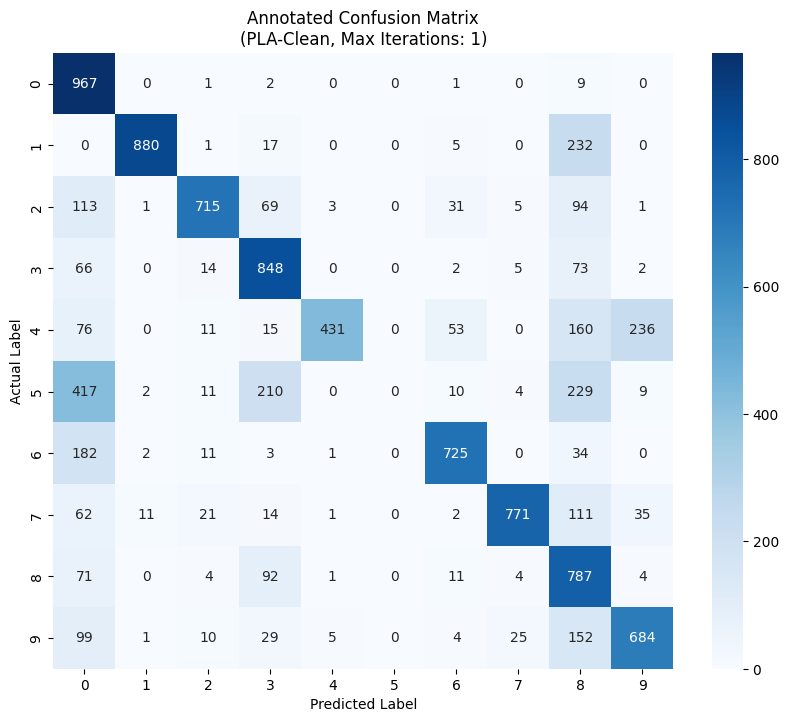

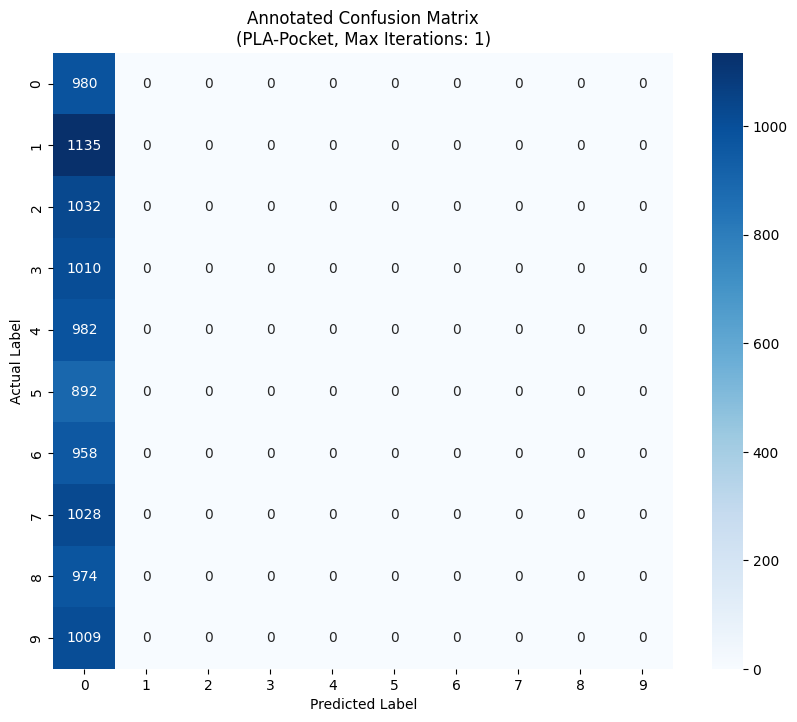

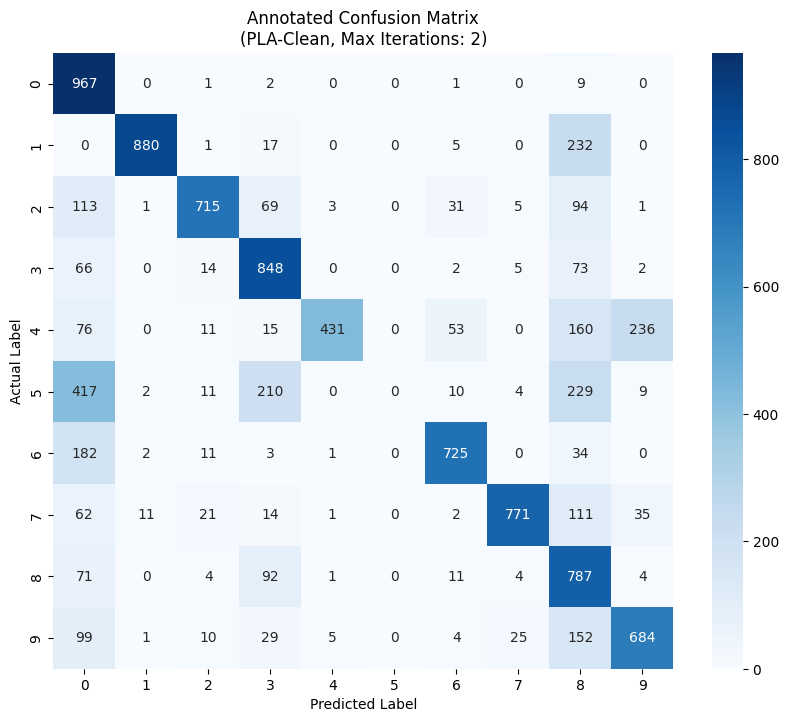

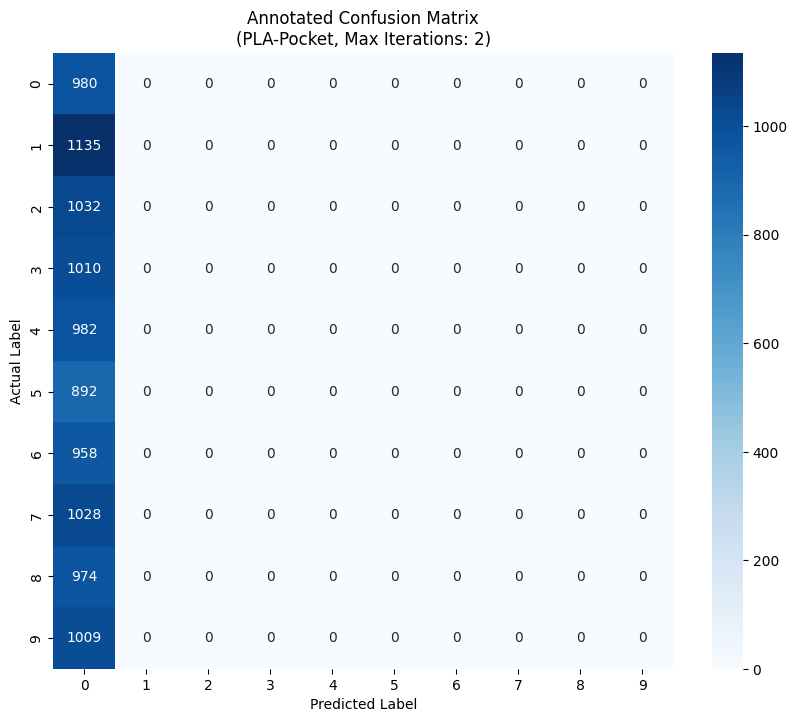

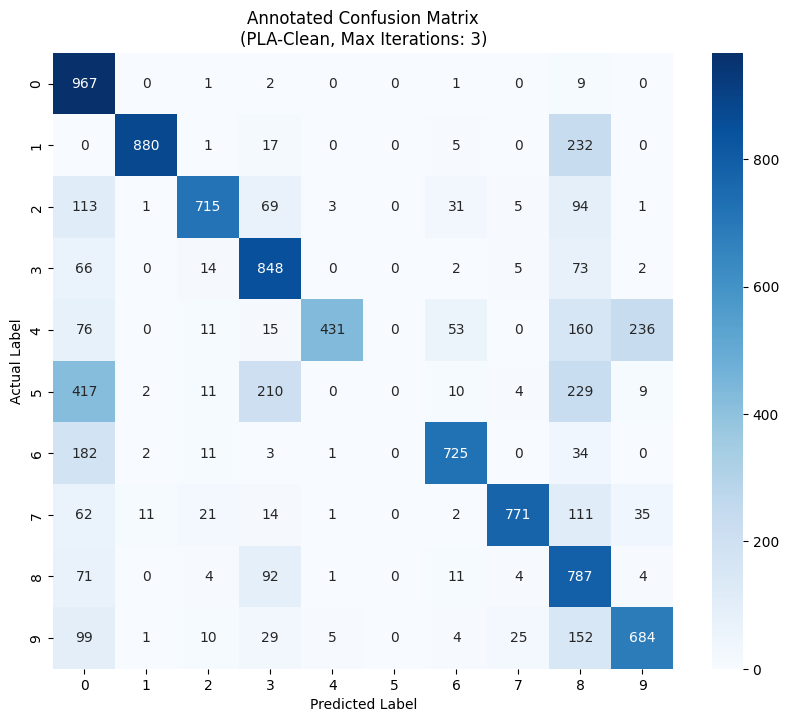

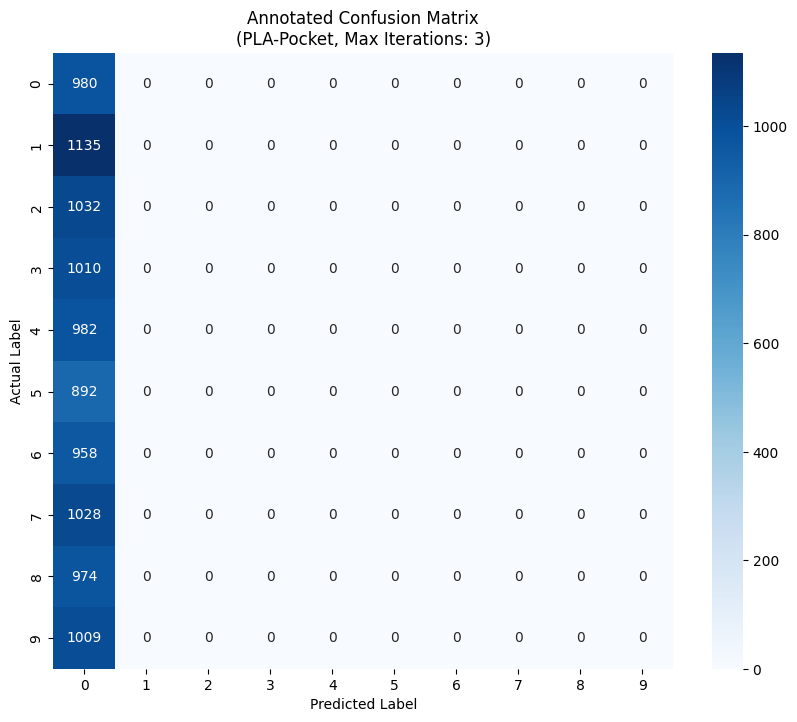

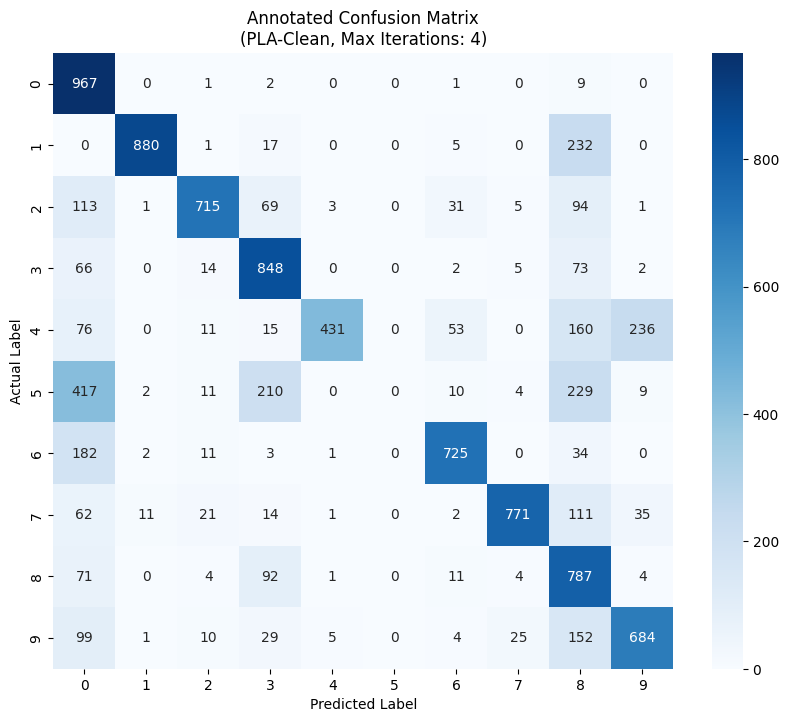

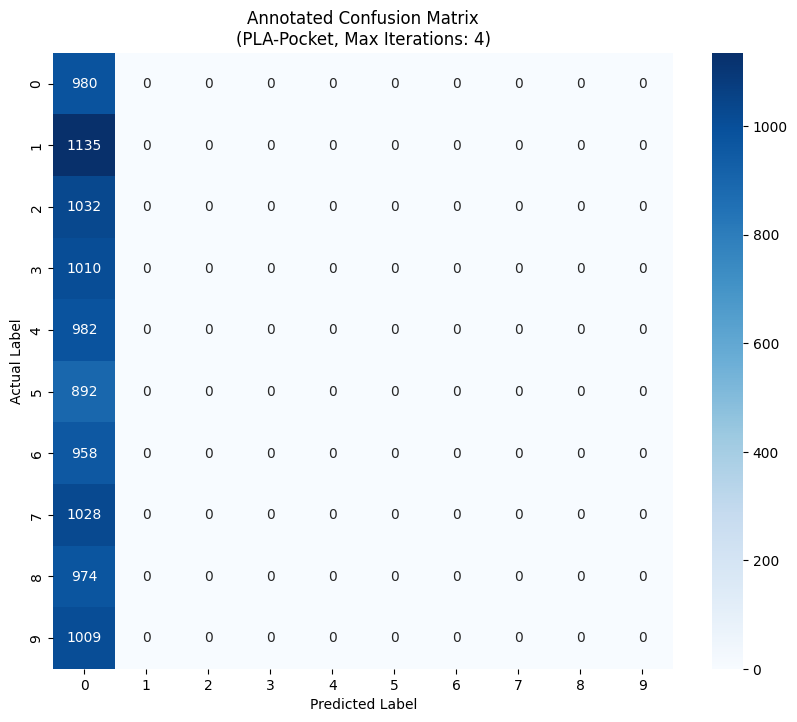

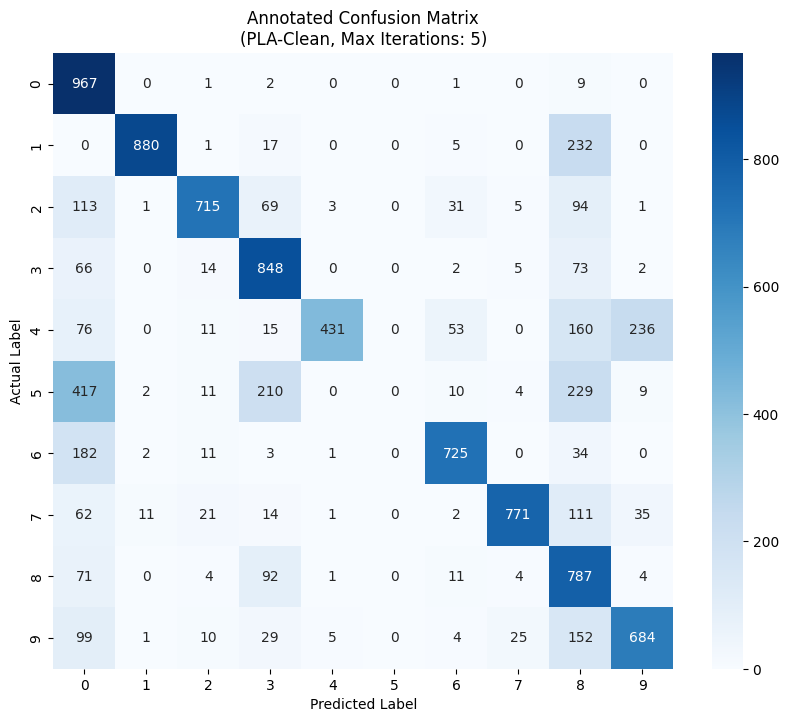

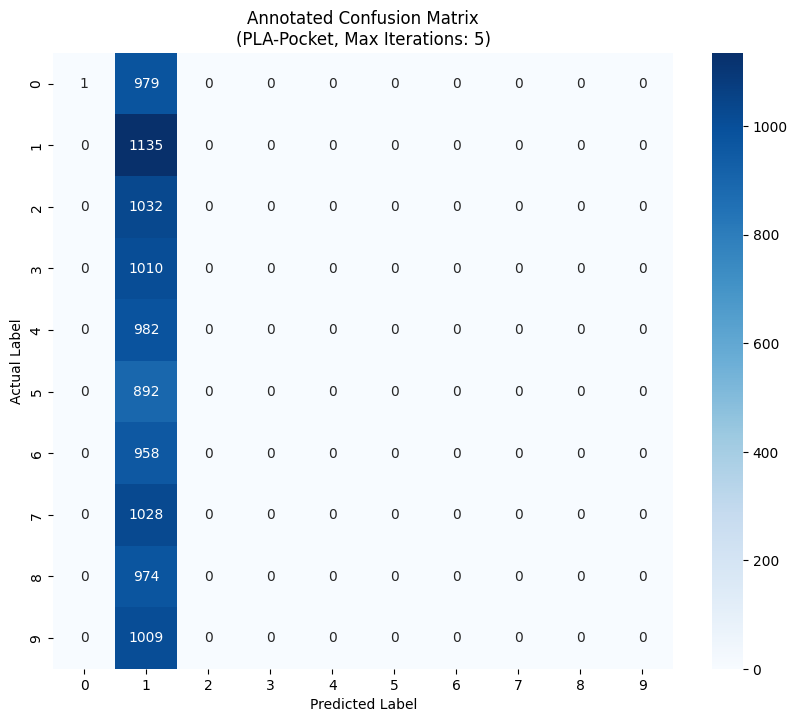

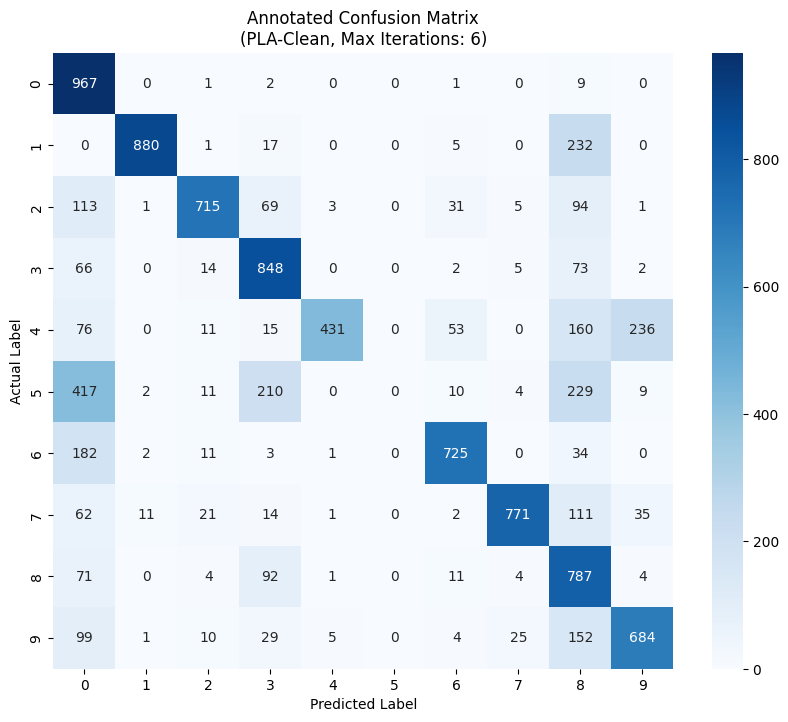

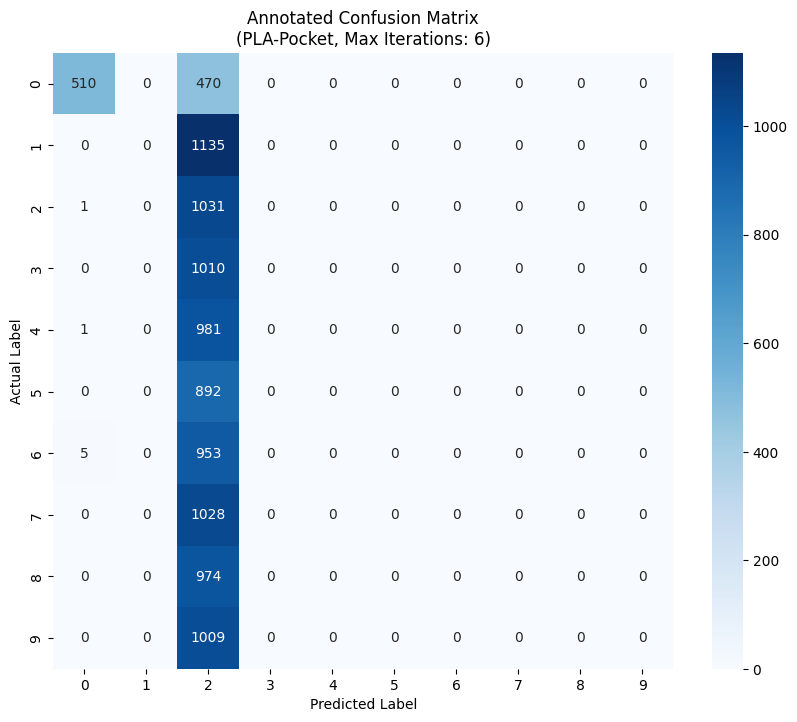

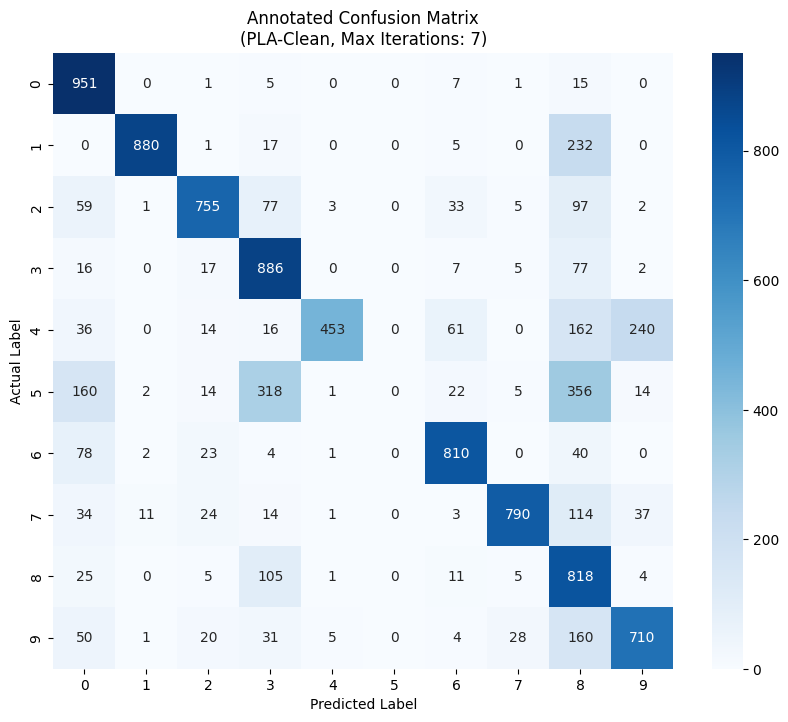

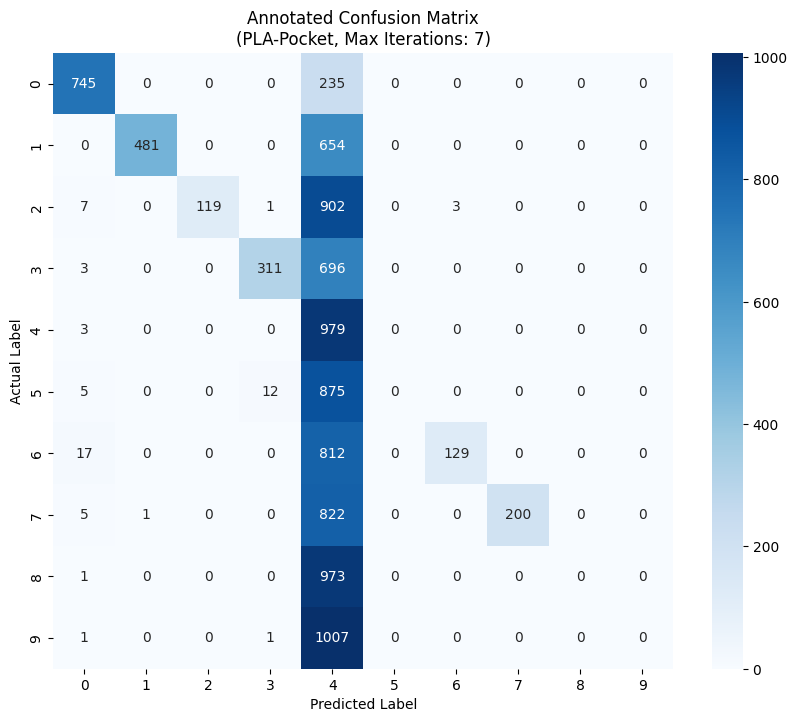

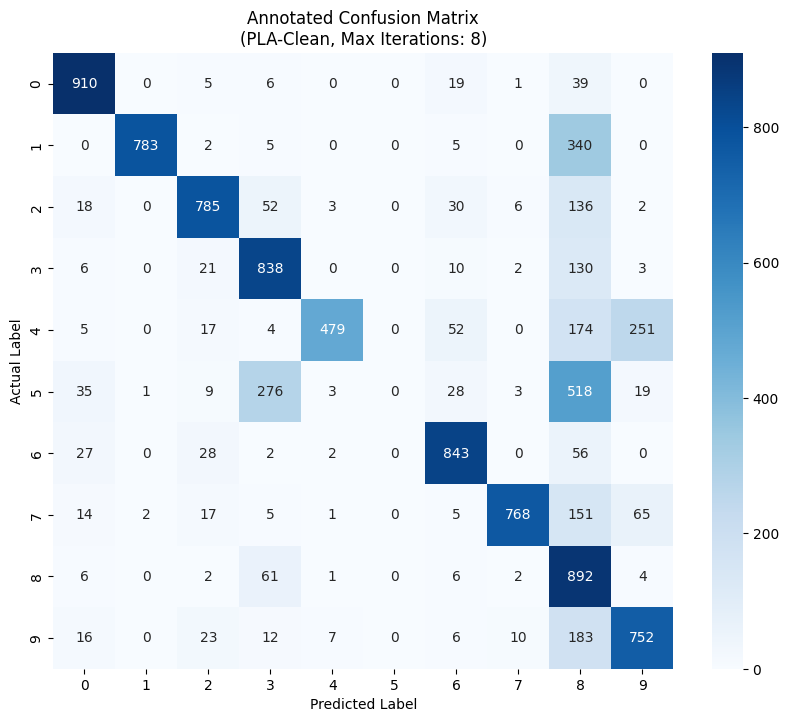

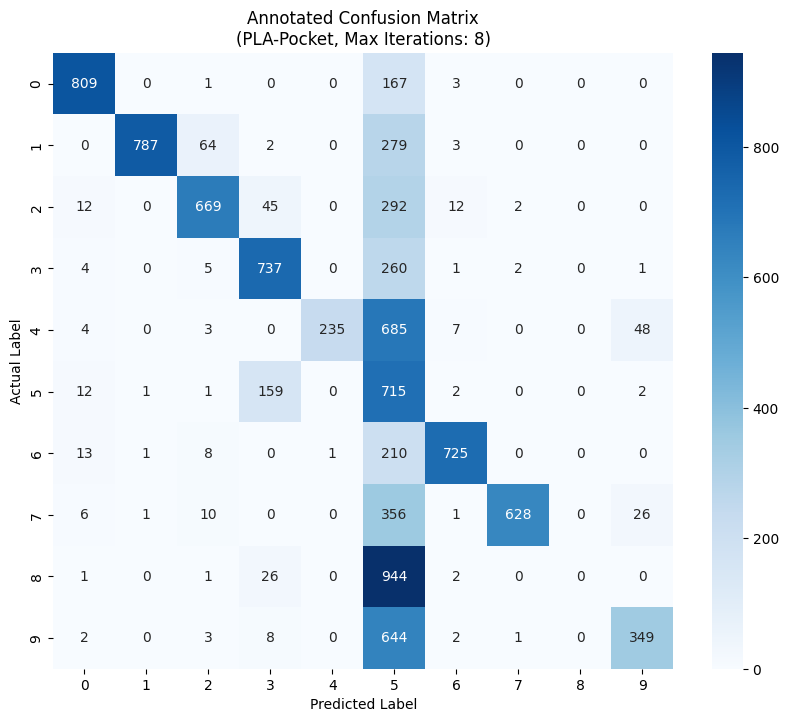

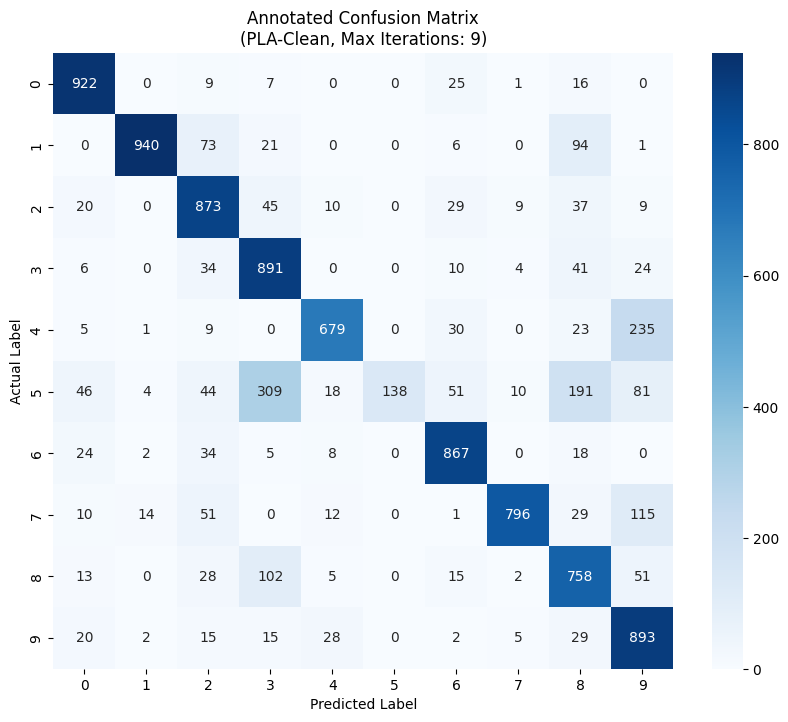

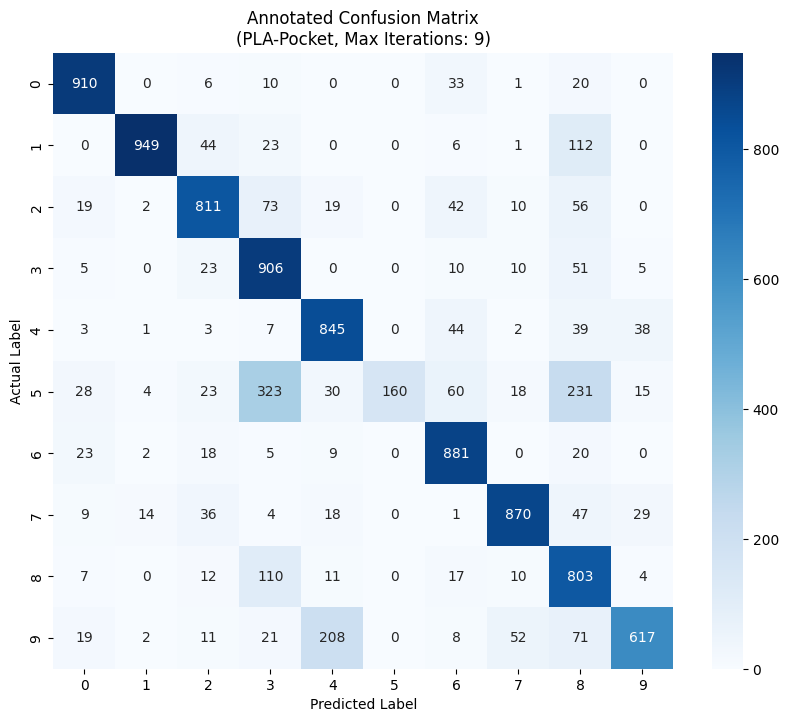

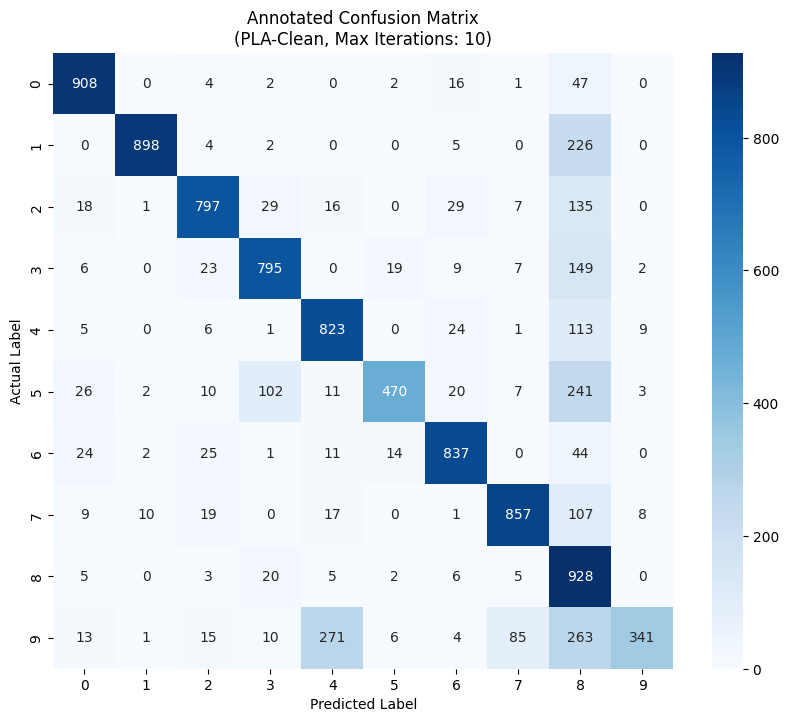

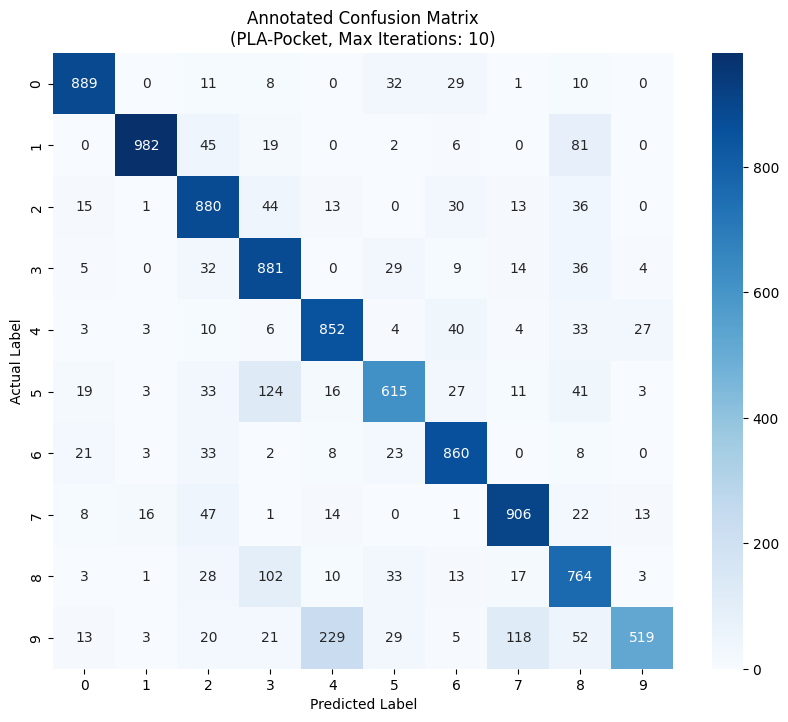

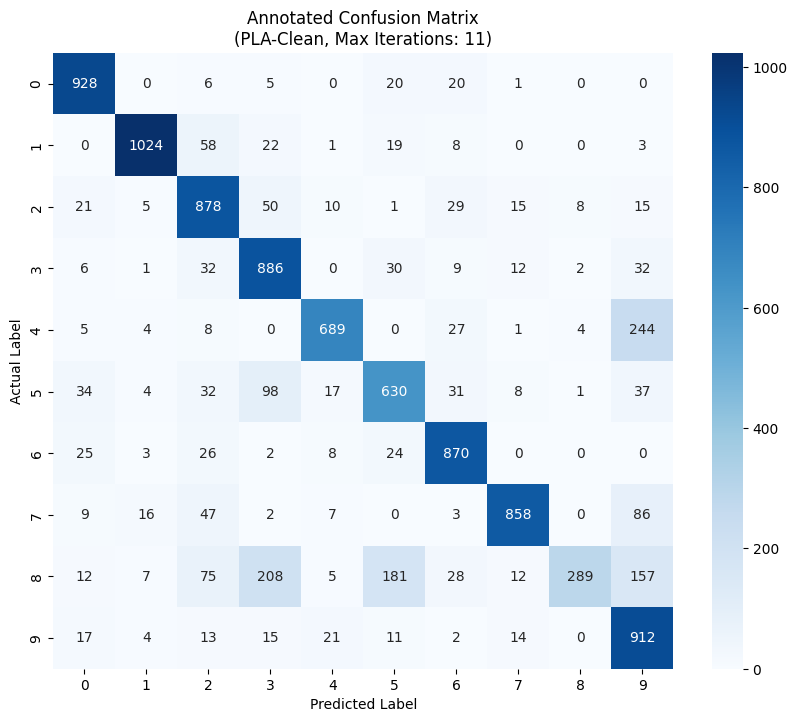

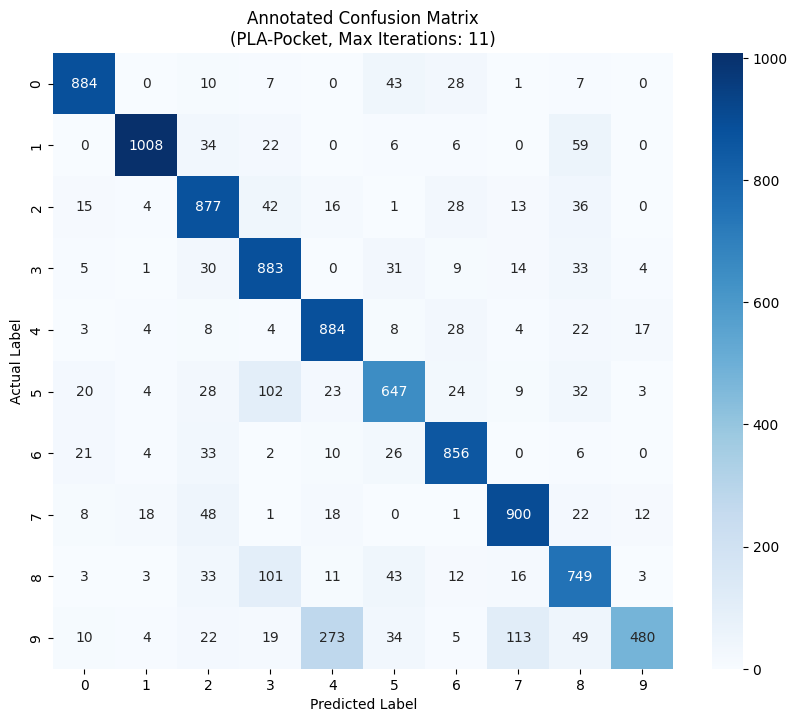

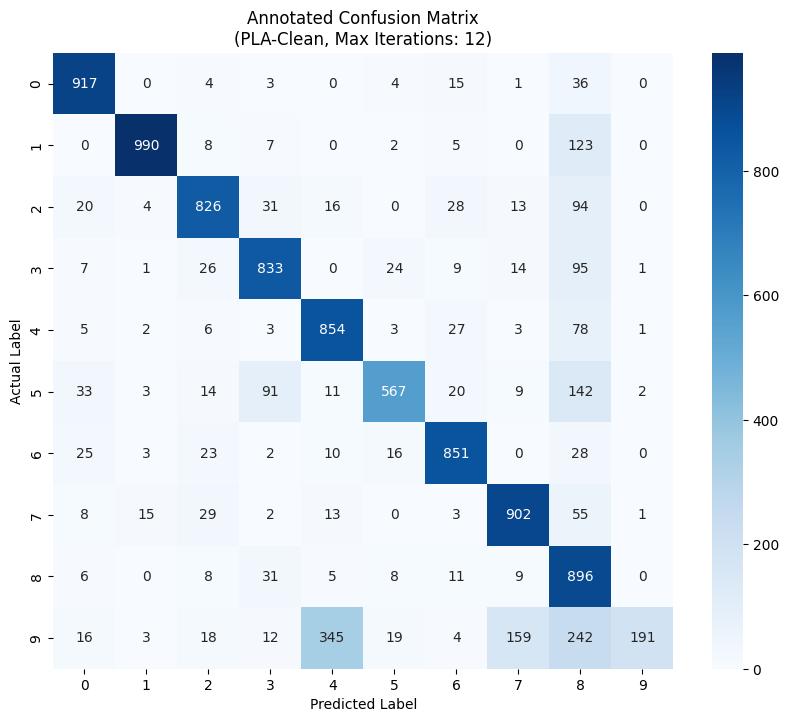

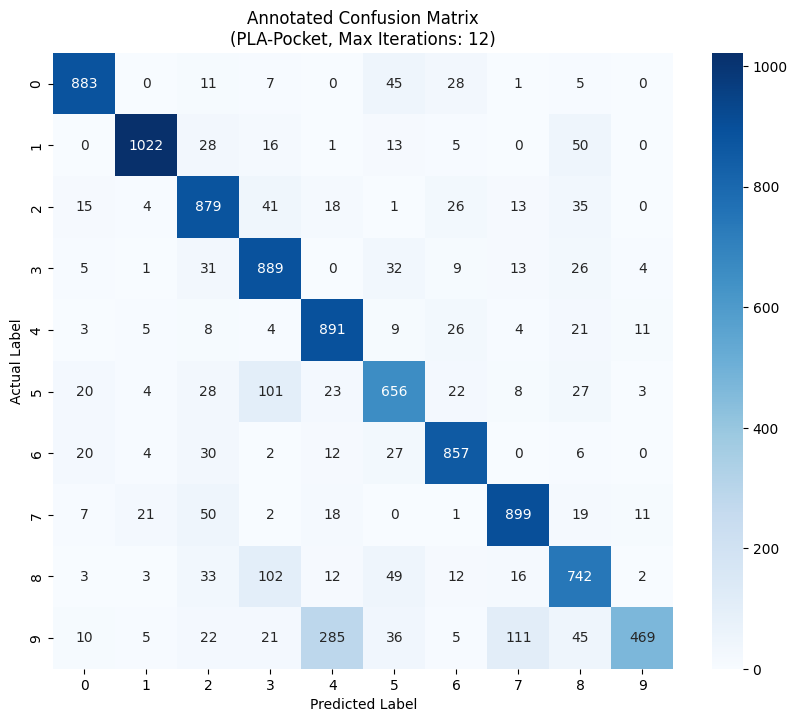

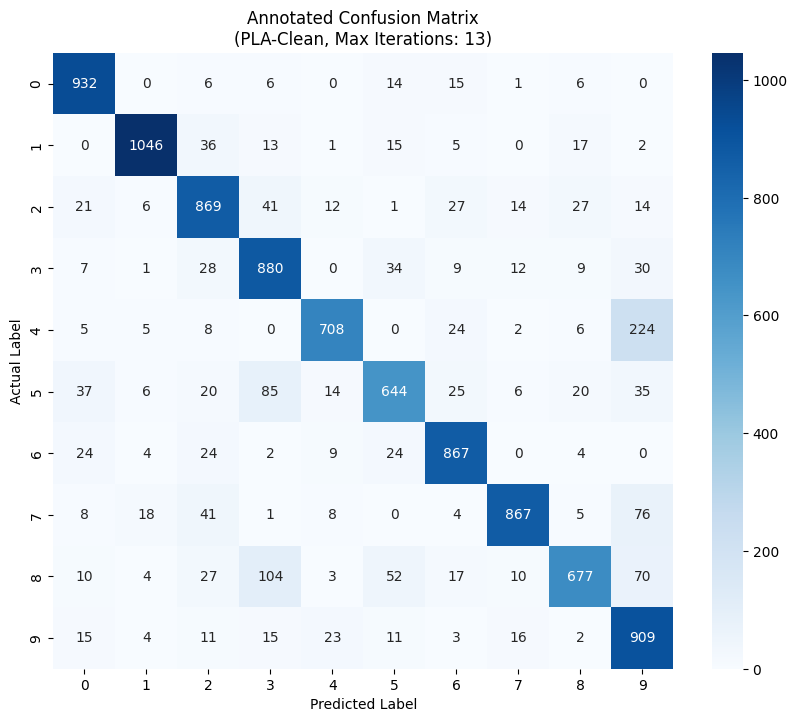

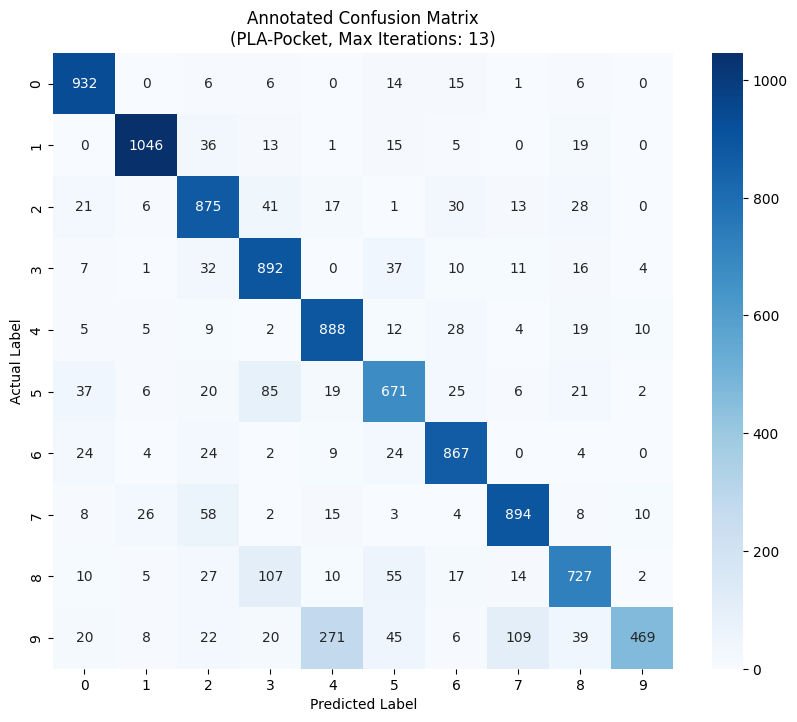

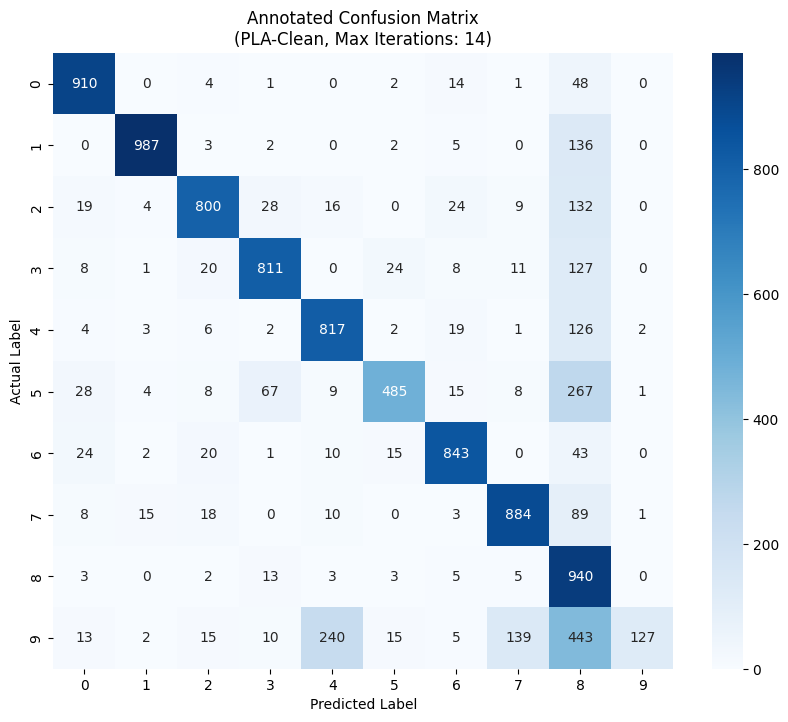

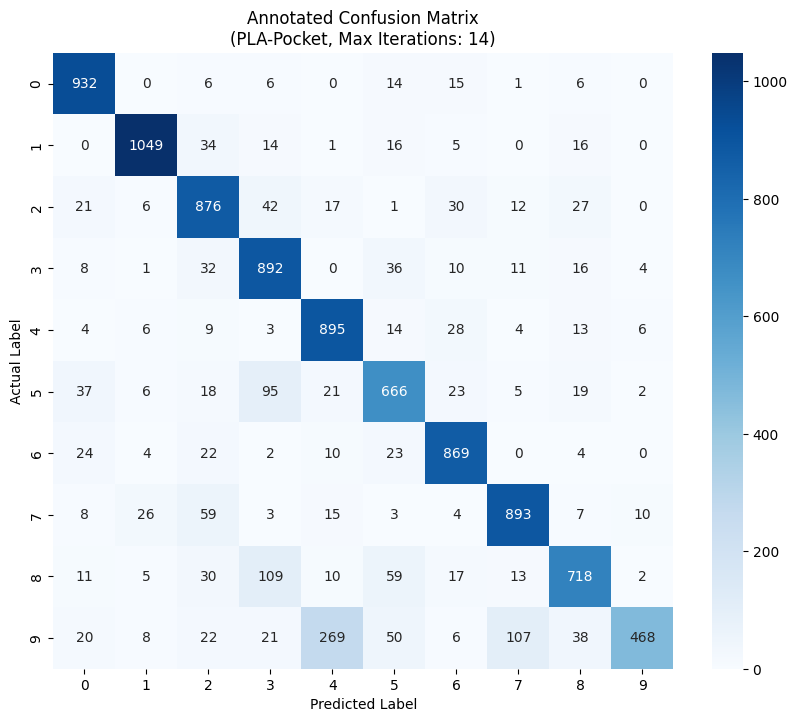

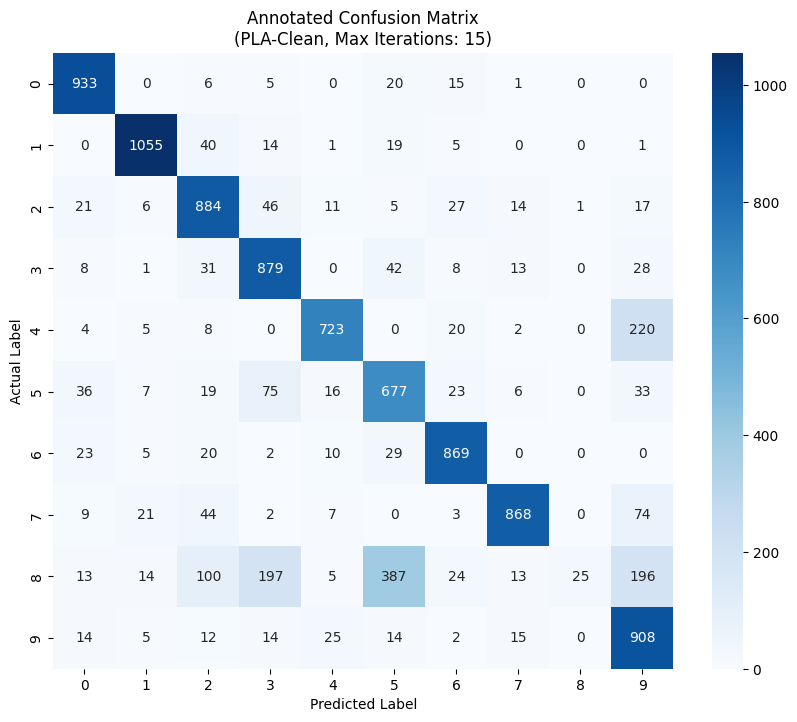

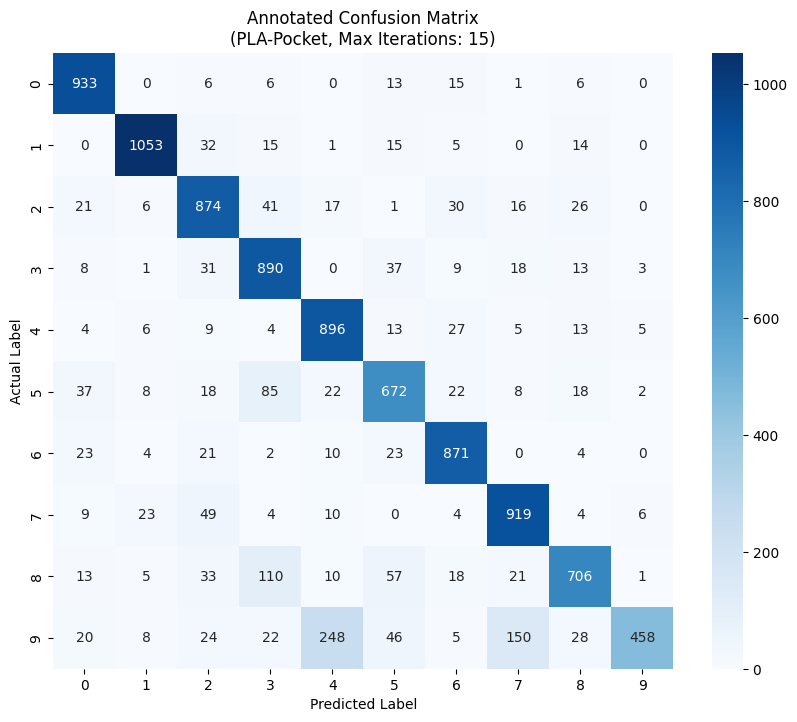

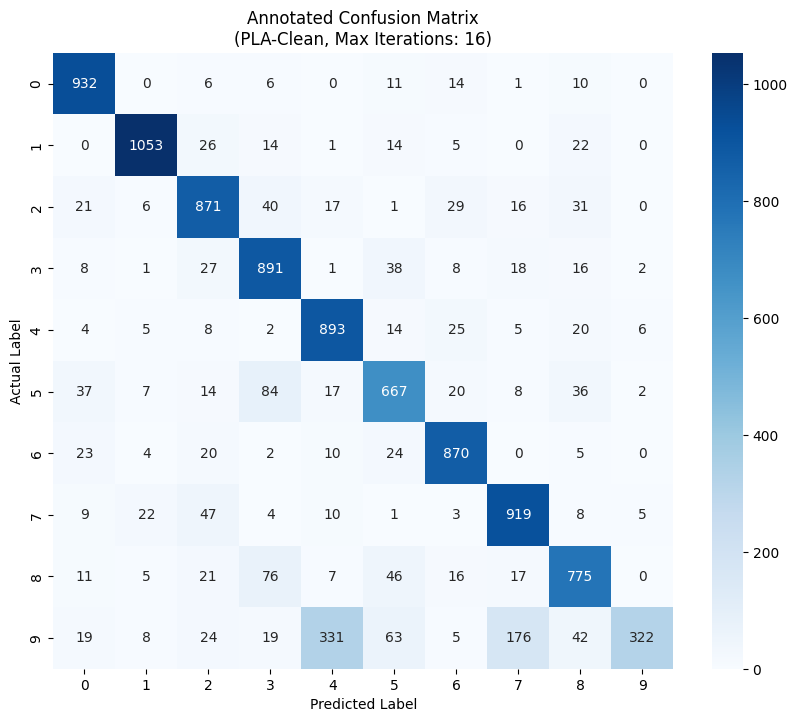

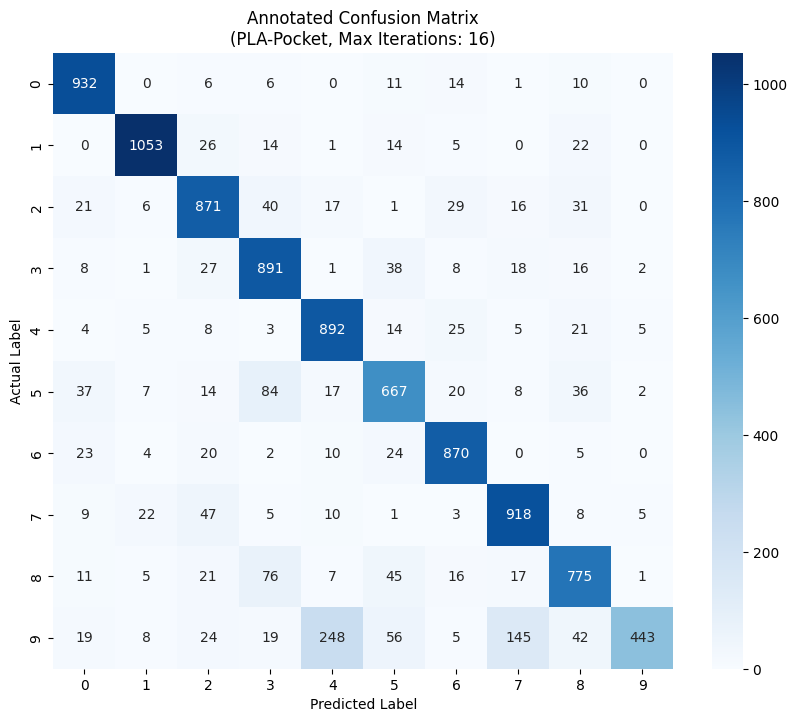

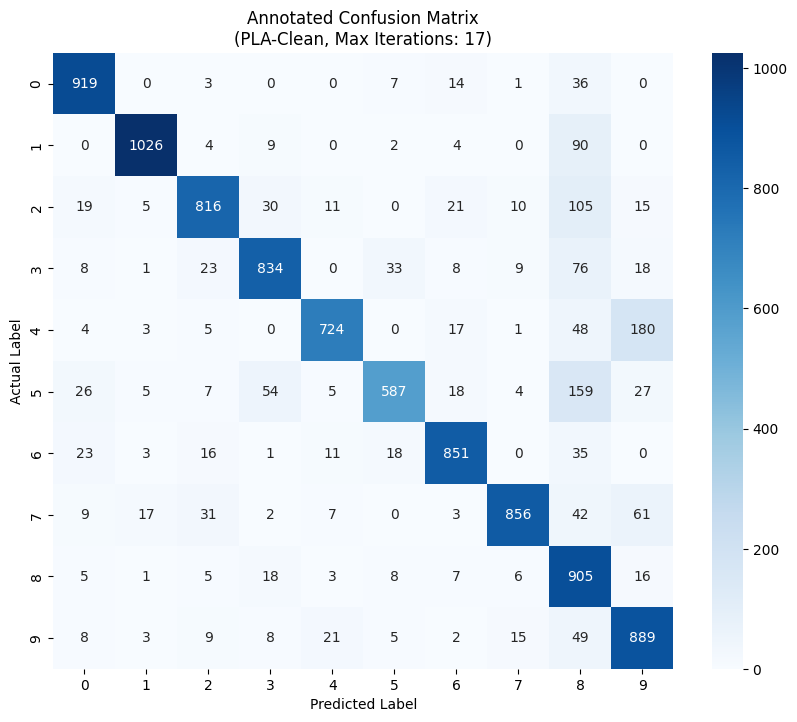

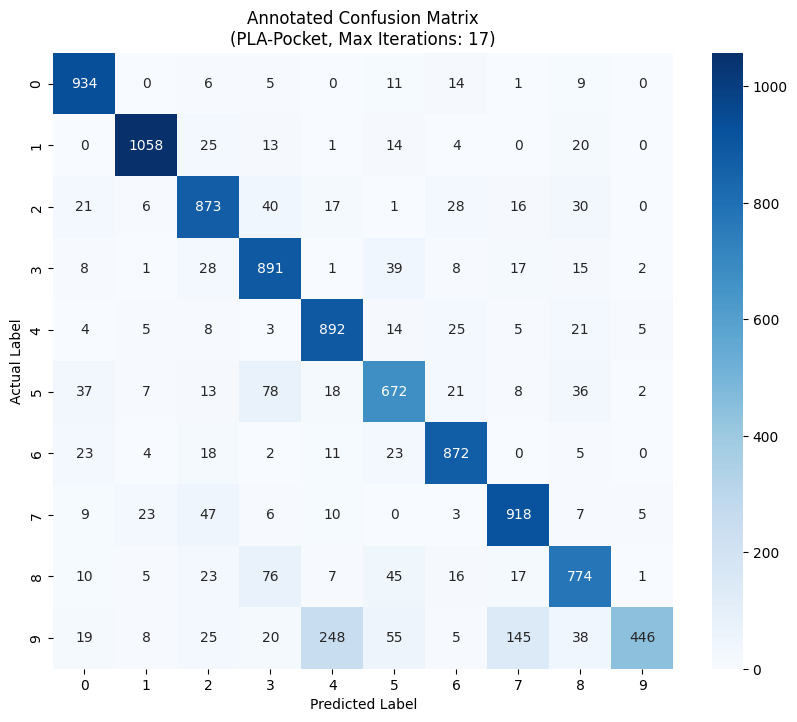

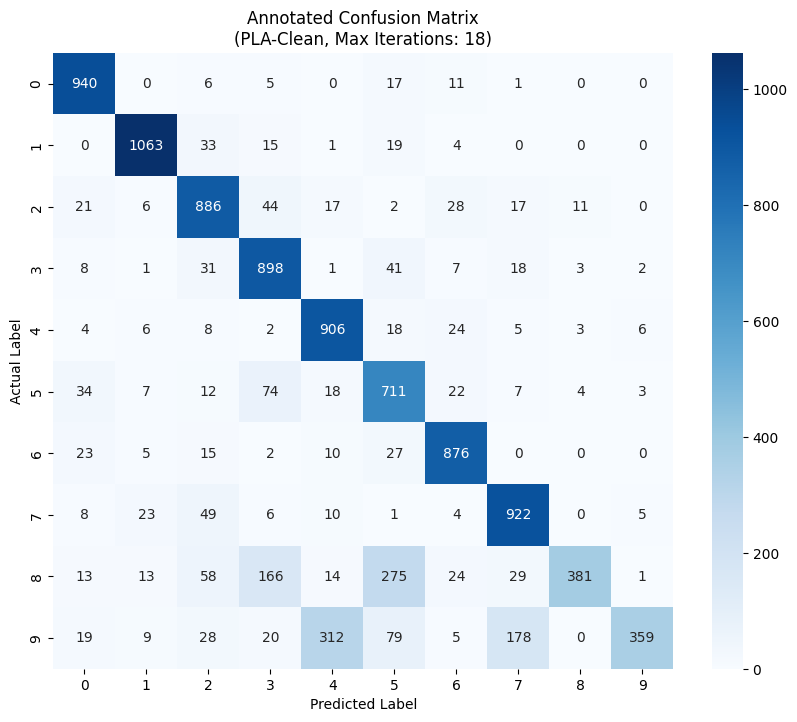

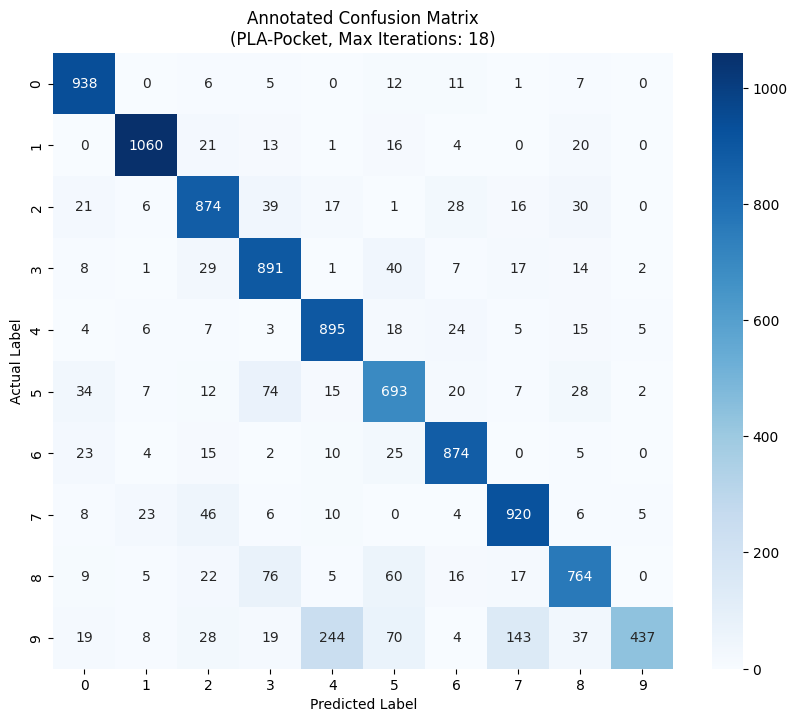

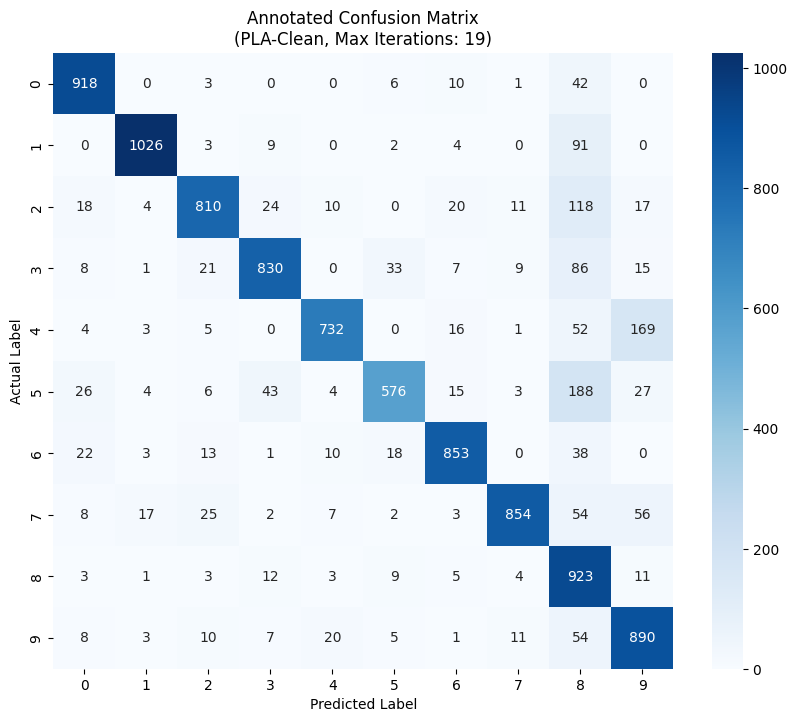

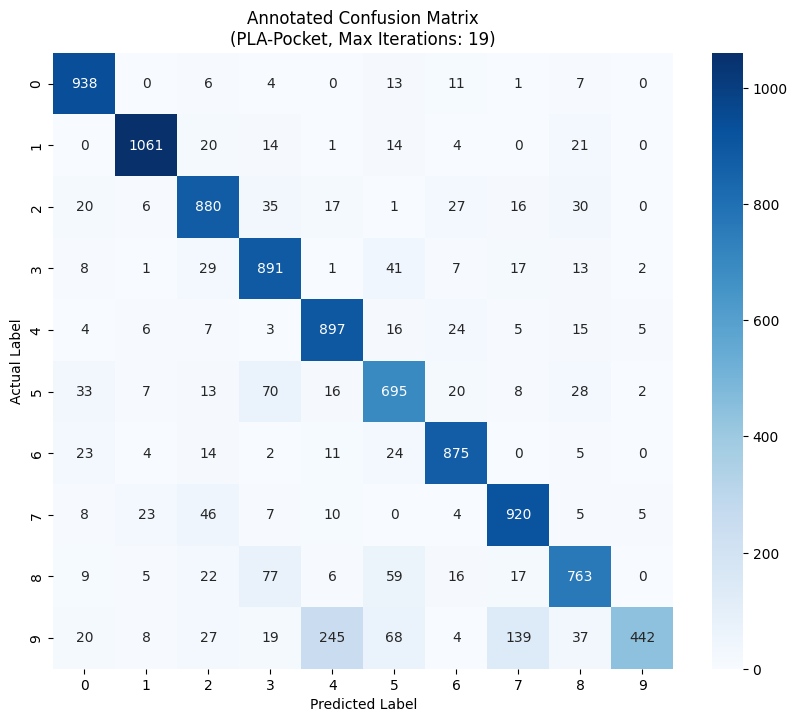

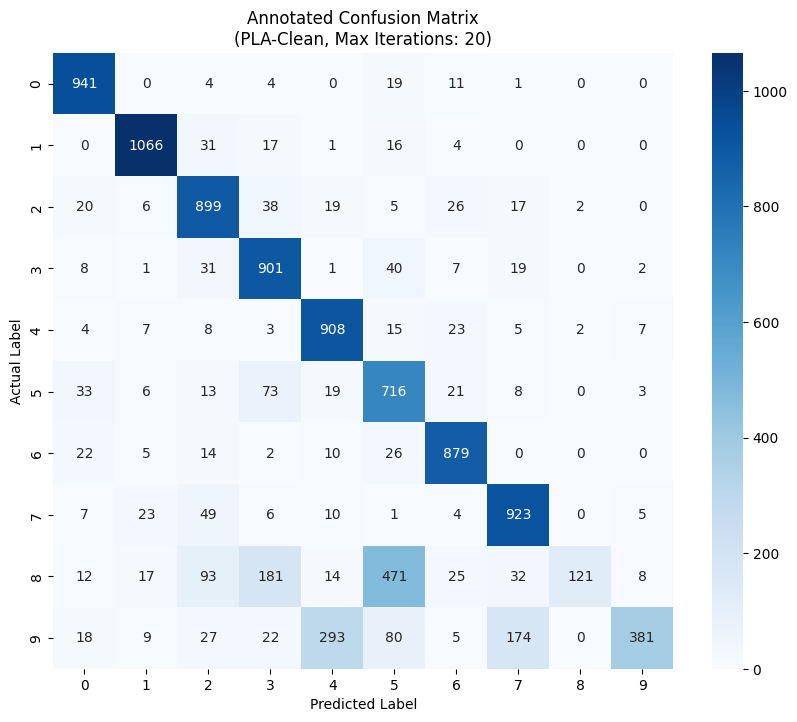

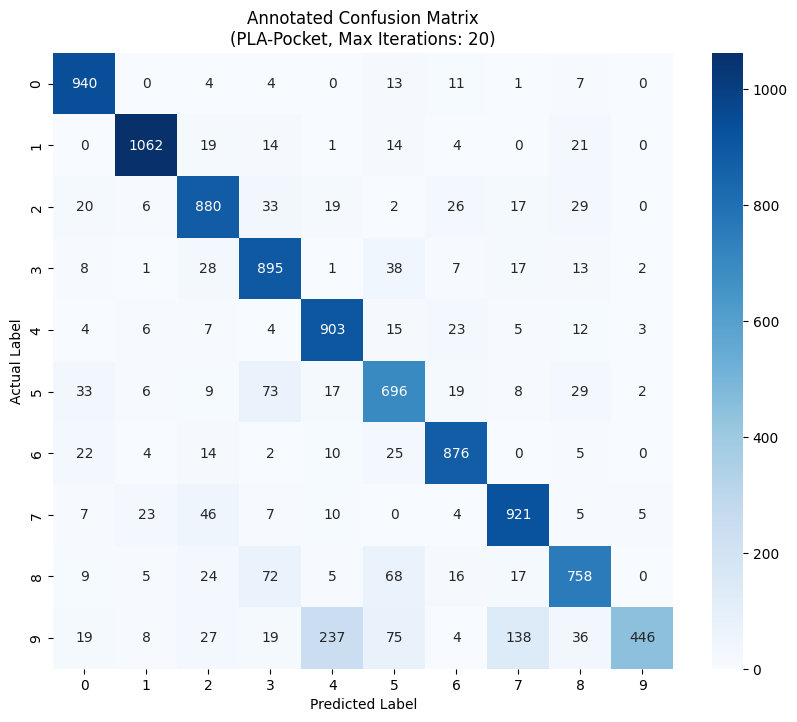

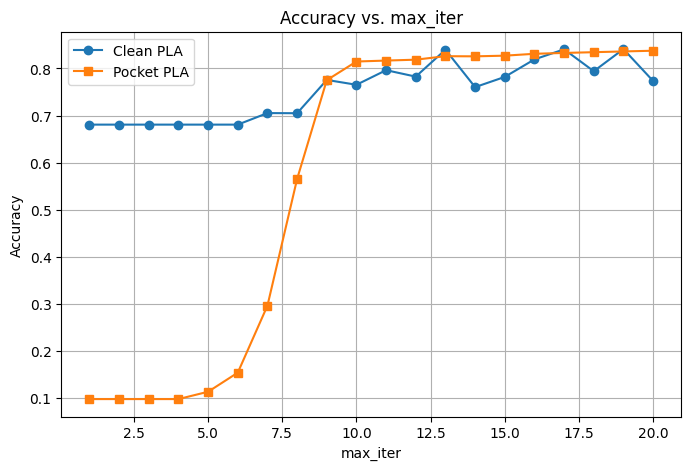

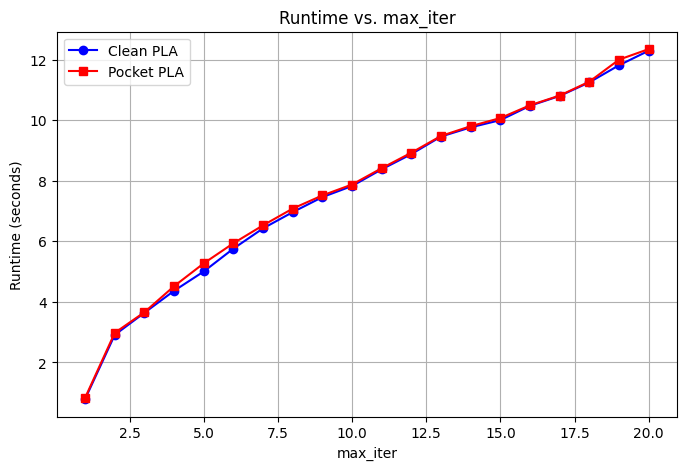

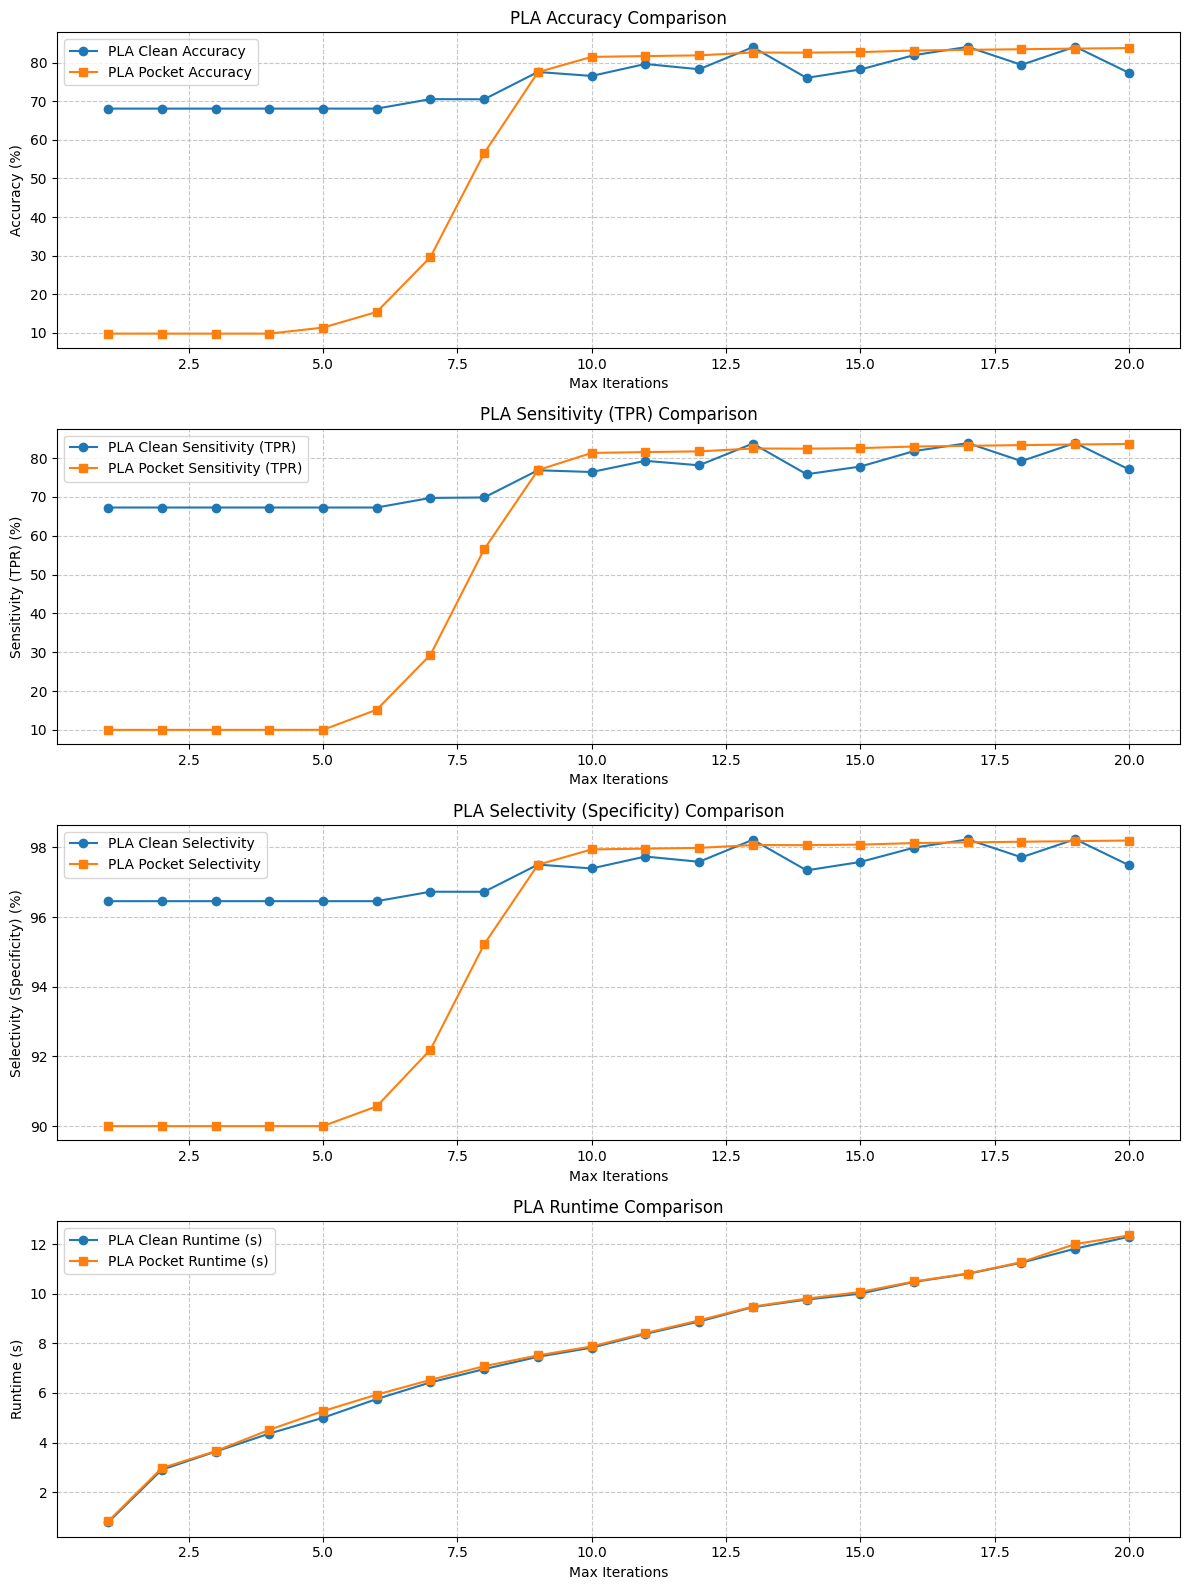

Mean Sensitivity (TPR) for Clean PLA: [np.float64(0.6726090803828507), np.float64(0.6726090803828507), np.float64(0.6726090803828507), np.float64(0.6726090803828507), np.float64(0.6726090803828507), np.float64(0.6726090803828507), np.float64(0.6973355590628569), np.float64(0.6984724611126393), np.float64(0.7685871436815497), np.float64(0.7640210177874475), np.float64(0.7928403794814772), np.float64(0.7813360127061935), np.float64(0.8373257887691533), np.float64(0.7582876604497218), np.float64(0.7780687908349748), np.float64(0.8178997229366443), np.float64(0.8384725012589642), np.float64(0.7921336140039087), np.float64(0.838935878631563), np.float64(0.7707176558320689)]
Mean Sensitivity (TPR) for Pocket PLA: [np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.1), np.float64(0.10010204081632652), np.float64(0.15194391710172442), np.float64(0.29333765692120073), np.float64(0.5651305028352104), np.float64(0.7689297756976436), np.float64(0.813220191319283), np.float64(0.8153477

In [3]:
## 2. Train, Evaluate, and Visualize Training Results
import os
import numpy as np
from core.models.perceptron.multi_class_perceptron import MultiClassPerceptron
from core.analysis.evaluation_functions import evaluate_model
from core.analysis.plotting import (
    plot_accuracy_vs_max_iter, 
    plot_runtime_vs_max_iter,
    plot_performance_summary_extended
)
from core.logger.config import logger

# Dictionaries to store trained models
trained_models_clean = {}
trained_models_pocket = {}

# Lists to store accuracy, runtime, sensitivity, and selectivity results
accuracies_clean = []
accuracies_pocket = []
runtimes_clean = []
runtimes_pocket = []
sensitivities_clean = []
sensitivities_pocket = []
selectivities_clean = []
selectivities_pocket = []

# ========== Train Clean and Pocket PLA for different max_iter values ==========
for max_iter in max_iter_values:
    logger.info(f"=== Training PLA with max_iter={max_iter} ===")

    # Train Clean PLA
    clean_perceptron = MultiClassPerceptron(num_classes=10, max_iter=max_iter, use_pocket=False)
    clean_perceptron.fit(X_train, y_train)
    trained_models_clean[max_iter] = clean_perceptron

    # Train Pocket PLA
    pocket_perceptron = MultiClassPerceptron(num_classes=10, max_iter=max_iter, use_pocket=True)
    pocket_perceptron.fit(X_train, y_train)
    trained_models_pocket[max_iter] = pocket_perceptron

    logger.info(f"Training complete for max_iter={max_iter}")

# ========== Evaluate Models ==========
for max_iter in max_iter_values:
    logger.info(f"=== Evaluating PLA with max_iter={max_iter} ===")

    # Retrieve trained models
    clean_perceptron = trained_models_clean[max_iter]
    pocket_perceptron = trained_models_pocket[max_iter]

    # Evaluate Clean PLA
    cm_clean, acc_clean, sens_clean, spec_clean, runtime_clean = evaluate_model(
        clean_perceptron, X_test, y_test, classes=list(range(10))
    )
    accuracies_clean.append(acc_clean)
    sensitivities_clean.append(np.mean(sens_clean))   # Mean sensitivity for reporting
    selectivities_clean.append(np.mean(spec_clean))     # Mean selectivity for reporting
    runtimes_clean.append(runtime_clean)

    # Evaluate Pocket PLA
    cm_pocket, acc_pocket, sens_pocket, spec_pocket, runtime_pocket = evaluate_model(
        pocket_perceptron, X_test, y_test, classes=list(range(10))
    )
    accuracies_pocket.append(acc_pocket)
    sensitivities_pocket.append(np.mean(sens_pocket))   # Mean sensitivity for reporting
    selectivities_pocket.append(np.mean(spec_pocket))     # Mean selectivity for reporting
    runtimes_pocket.append(runtime_pocket)

    logger.info(f"Evaluation complete for max_iter={max_iter}")

# ========== Summary Plots ==========
# Plot accuracy vs. max_iter
plot_accuracy_vs_max_iter(
    max_iter_values,
    accuracies_clean,
    accuracies_pocket,
)

# Plot runtime vs. max_iter
plot_runtime_vs_max_iter(
    max_iter_values,
    runtimes_clean,
    runtimes_pocket,
)

# Plot comprehensive summary: Accuracy, Sensitivity (TPR), Selectivity (TNR), and Runtime vs. max_iter
plot_performance_summary_extended(
    max_iter_values,
    accuracies_clean, accuracies_pocket,
    sensitivities_clean, sensitivities_pocket,
    selectivities_clean, selectivities_pocket,
    runtimes_clean, runtimes_pocket,
)

logger.info("Plotted accuracy, sensitivity, selectivity, and runtime vs. max_iter.")

# Optionally, print out a summary of the metrics:
print("Mean Sensitivity (TPR) for Clean PLA:", sensitivities_clean)
print("Mean Sensitivity (TPR) for Pocket PLA:", sensitivities_pocket)
print("Mean Selectivity (TNR) for Clean PLA:", selectivities_clean)
print("Mean Selectivity (TNR) for Pocket PLA:", selectivities_pocket)


## 3. Visualize Training Error Curves

Each digit-specific classifier within the `MultiClassPerceptron` stores iteration-level training errors. We aggregate these losses across all digit classifiers to create an average training error curve. This provides a high-level overview of how the algorithm's error evolves over time for both Clean and Pocket PLA.

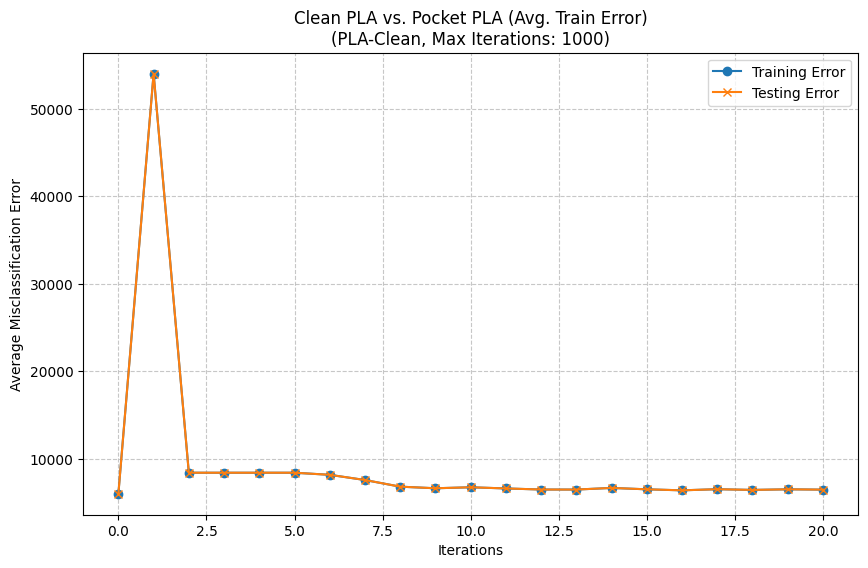

In [4]:
## 3. Visualize Training Error Curves

import numpy as np
from core.logger.config import logger
from core.analysis.plotting import plot_error_curves

# Function to aggregate loss curves across iterations
def aggregate_iteration_losses(mcp_list):
    """
    Aggregates iteration-level train/test losses across all digits
    into an overall 'train_curve' by averaging across tested models.
    """
    num_classes = mcp_list[0].num_classes  # Assume all models have the same num_classes

    # Determine the maximum number of iterations across all models
    max_len = max(max(len(mcp.loss_history[cls_idx]["train"]) for cls_idx in range(num_classes)) for mcp in mcp_list)

    all_train_curves = []

    for mcp in mcp_list:
        all_train = []
        for cls_idx in range(num_classes):
            t_arr = mcp.loss_history[cls_idx]["train"][:]

            # If classifier converged early, pad with last value
            if len(t_arr) < max_len:
                t_arr += [t_arr[-1]] * (max_len - len(t_arr))

            all_train.append(t_arr)

        # Convert to NumPy array and compute mean curve
        all_train = np.array(all_train)
        train_curve = np.mean(all_train, axis=0)

        all_train_curves.append(train_curve)

    # Convert all train curves into a uniform NumPy array
    all_train_curves = np.array(all_train_curves)

    return np.mean(all_train_curves, axis=0)  # Final averaged curve


logger.info("=== Plotting Average Training Curves for Clean vs Pocket PLA ===")

# Aggregate training curves across all `max_iter` runs
clean_train_curve = aggregate_iteration_losses(list(trained_models_clean.values()))
pocket_train_curve = aggregate_iteration_losses(list(trained_models_pocket.values()))

plot_error_curves(
    train_curve=clean_train_curve, 
    test_curve=pocket_train_curve,
    title="Clean PLA vs. Pocket PLA (Avg. Train Error)")



## 4. Summary of Performance Across Iterations

This section provides a comprehensive comparison of Clean PLA and Pocket PLA across multiple iteration settings (`max_iter`). The performance summary includes:
- **Overall Accuracy (%):** Measures the classification success rate.
- **Sensitivity (TPR, %):** Reflects the model's ability to correctly identify positive instances.
- **Selectivity (TNR, %):** Assesses how well the model identifies negatives.
- **Training Runtime (seconds):** Evaluates computational efficiency.

By analyzing these results, we can assess the trade-off between accuracy improvements and increased training time as `max_iter` increases, guiding optimal hyperparameter selection.


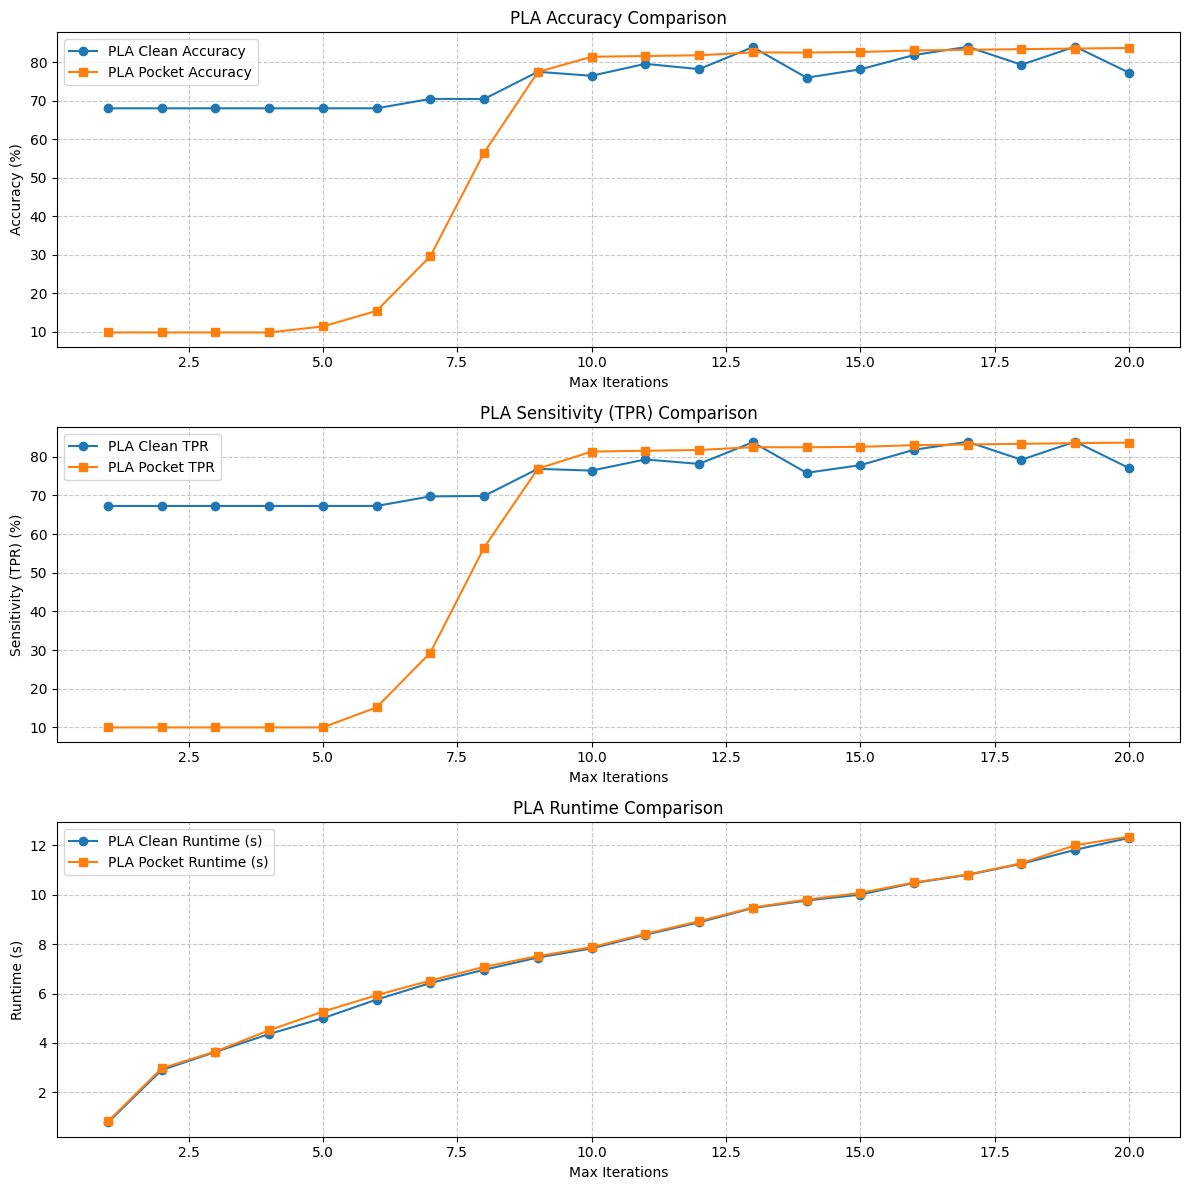

In [5]:
from core.analysis.plotting import plot_performance_summary
# Generate performance plots
plot_performance_summary(max_iter_values, accuracies_clean, accuracies_pocket,
                         sensitivities_clean, sensitivities_pocket,
                         runtimes_clean, runtimes_pocket)


## 5. Final Results Summary

**Observations:**
- **Pocket PLA** consistently outperforms Clean PLA in both accuracy and sensitivity (TPR) across all tested iteration counts.
- Increasing `max_iter` improves performance, though gains tend to plateau beyond roughly 50–100 iterations.
- **Runtime** increases nearly linearly with `max_iter` for both methods, highlighting a clear trade-off between higher accuracy and computational cost.
- Perfect linear separation is not achieved—even at higher iteration counts, neither method reaches 100% accuracy, indicating that the dataset is not strictly linearly separable.

**Trade-off Analysis:**
- **Low Iterations (max_iter = 10–30):**  
  Fast training with modest accuracy and TPR, suitable for rapid prototyping or time-sensitive applications.
- **Medium Iterations (max_iter = 50–100):**  
  Balanced performance and runtime, capturing most achievable gains without excessive overhead.
- **High Iterations (max_iter > 100):**  
  Marginal performance improvements with significant runtime increase; diminishing returns for practical applications.

**Recommendations for Future Work:**
- Experiment with alternative update rules (e.g., adaptive learning rates) to accelerate convergence.
- Compare against more sophisticated models (e.g., Logistic Regression, SVMs, neural networks) for broader insights.
- Evaluate model robustness under noisy or adversarial conditions.

This comprehensive analysis—including confusion matrices, error curves, and summary plots—provides detailed insights into the performance of the multi-class Perceptron on MNIST and informs the optimal balance between training efficiency and classification performance.
